In [37]:

import requests
from datetime import datetime
import pandas as pd

def get_binance_data(symbol, interval, start_time, end_time):
    url = "https://api.binance.com/api/v3/klines"
    params = {
        "symbol": symbol,
        "interval": interval,
        "startTime": start_time,
        "endTime": end_time
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Set parameters
symbols = ["BTCUSDT","ETHUSDT","ETHBTC"]
interval = "1h"
start_time = int(datetime(2020, 1, 1).timestamp() * 1000)
end_time = int(datetime.now().timestamp() * 1000)

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

for symbol in symbols:
    # Fetch data
    data = get_binance_data(symbol, interval, start_time, end_time)

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df['Close'] = df['Close'].astype(float)
    df['Symbol'] = symbol  # Add a column to identify the symbol

    # Append to the all_data DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

# Display results
print(all_data[['Open time', 'Symbol', 'Close']])

               Open time   Symbol        Close
0    2019-12-31 23:00:00  BTCUSDT  7195.230000
1    2020-01-01 00:00:00  BTCUSDT  7177.020000
2    2020-01-01 01:00:00  BTCUSDT  7216.270000
3    2020-01-01 02:00:00  BTCUSDT  7242.850000
4    2020-01-01 03:00:00  BTCUSDT  7225.010000
...                  ...      ...          ...
1495 2020-01-21 14:00:00   ETHBTC     0.019441
1496 2020-01-21 15:00:00   ETHBTC     0.019437
1497 2020-01-21 16:00:00   ETHBTC     0.019394
1498 2020-01-21 17:00:00   ETHBTC     0.019390
1499 2020-01-21 18:00:00   ETHBTC     0.019343

[1500 rows x 3 columns]


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open time                     1500 non-null   datetime64[ns]
 1   Open                          1500 non-null   object        
 2   High                          1500 non-null   object        
 3   Low                           1500 non-null   object        
 4   Close                         1500 non-null   float64       
 5   Volume                        1500 non-null   object        
 6   Close time                    1500 non-null   int64         
 7   Quote asset volume            1500 non-null   object        
 8   Number of trades              1500 non-null   int64         
 9   Taker buy base asset volume   1500 non-null   object        
 10  Taker buy quote asset volume  1500 non-null   object        
 11  Ignore                        

In [87]:
import requests
from datetime import datetime, timedelta
import pandas as pd

def get_binance_data(symbol, interval, start_time, end_time):
    url = "https://api.binance.com/api/v3/klines"
    all_klines = []
    
    while start_time < end_time:
        params = {
            "symbol": symbol,
            "interval": interval,
            "startTime": start_time,
            "endTime": end_time,
            "limit": 1000
        }
        response = requests.get(url, params=params)
        klines = response.json()
        
        if not klines:
            break
        
        all_klines.extend(klines)
        start_time = klines[-1][0] + 1  # Update start_time to the next candle
    
    return all_klines

# Set parameters
symbols = ["BTCUSDT", "ETHUSDT", "ETHBTC"]
interval = "1m"
start_time = int(datetime(2024, 12, 31).timestamp() * 1000)
end_time = int(datetime.now().timestamp() * 1000)

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

for symbol in symbols:
    # Fetch data
    data = get_binance_data(symbol, interval, start_time, end_time)

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df['Close'] = df['Close'].astype(float)
    df['Symbol'] = symbol  # Add a column to identify the symbol

    # Append to the all_data DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

# Display results
print(all_data[['Open time', 'Symbol', 'Close']])


                 Open time   Symbol        Close
0      2024-12-30 23:00:00  BTCUSDT  92712.72000
1      2024-12-30 23:01:00  BTCUSDT  92636.00000
2      2024-12-30 23:02:00  BTCUSDT  92601.35000
3      2024-12-30 23:03:00  BTCUSDT  92654.96000
4      2024-12-30 23:04:00  BTCUSDT  92593.08000
...                    ...      ...          ...
102100 2025-01-23 14:10:00   ETHBTC      0.03158
102101 2025-01-23 14:11:00   ETHBTC      0.03159
102102 2025-01-23 14:12:00   ETHBTC      0.03159
102103 2025-01-23 14:13:00   ETHBTC      0.03159
102104 2025-01-23 14:14:00   ETHBTC      0.03160

[102105 rows x 3 columns]


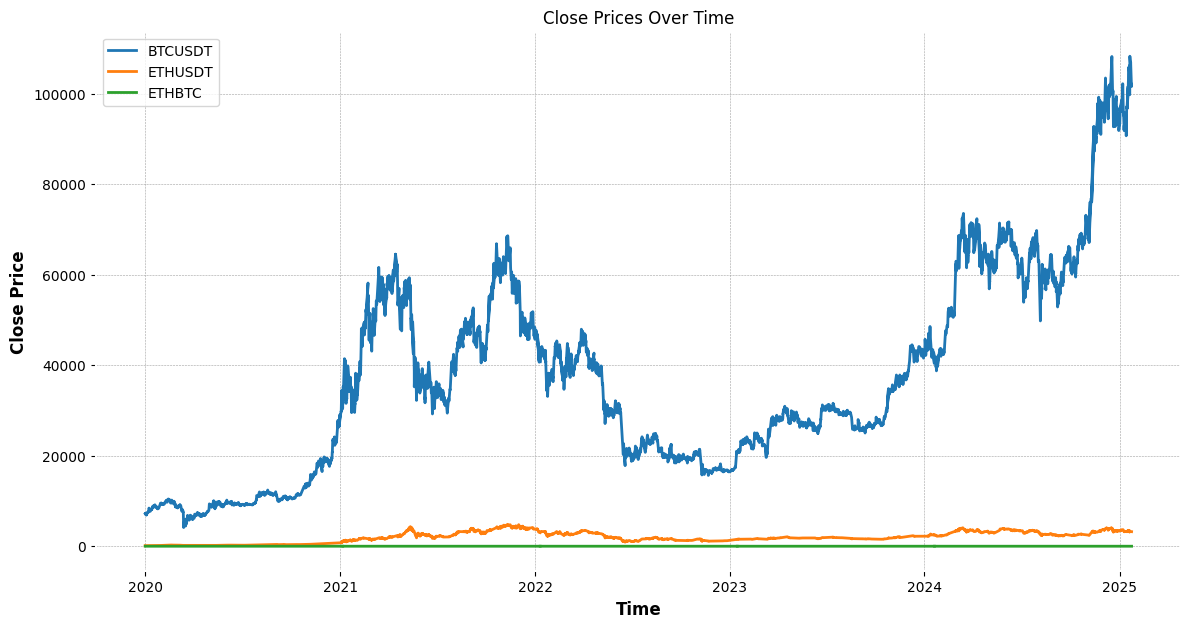

In [39]:
# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

for symbol in symbols:
    symbol_data = all_data[all_data['Symbol'] == symbol]
    plt.plot(symbol_data['Open time'], symbol_data['Close'], label=symbol)

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Close Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

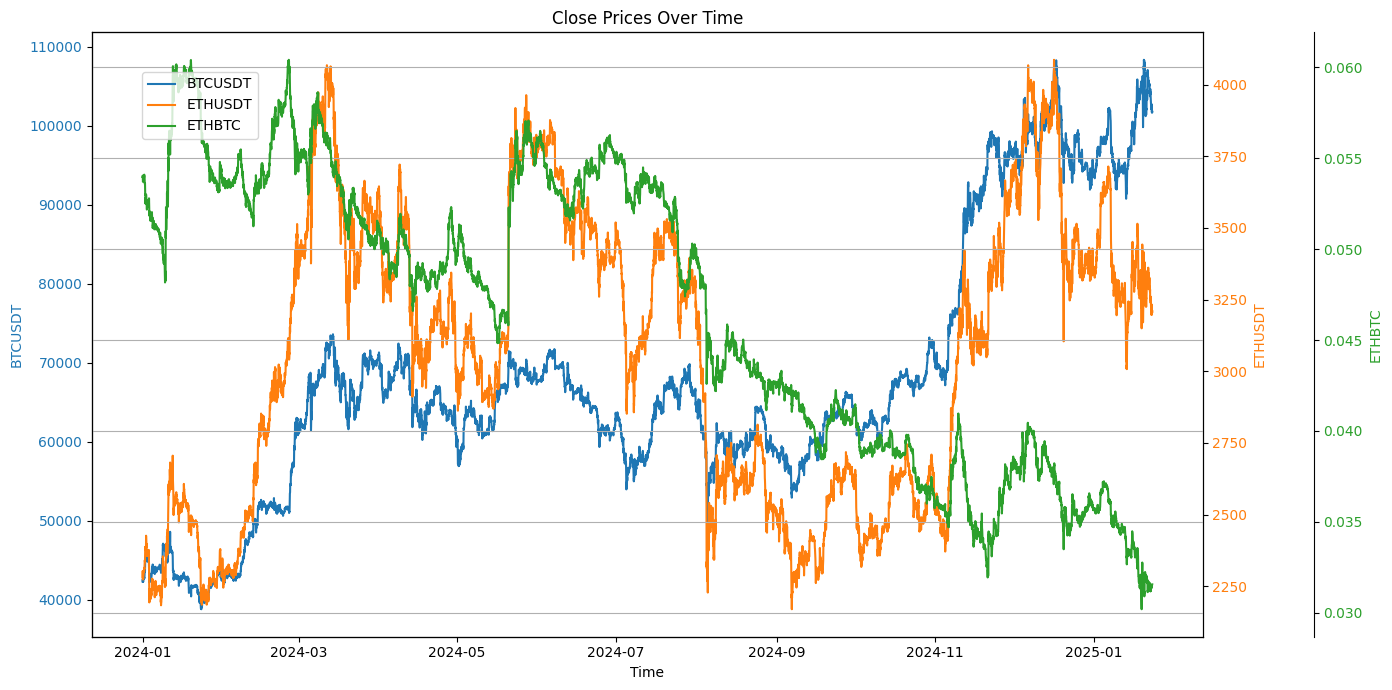

In [6]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the first symbol on the primary y-axis
symbol_data = all_data[all_data['Symbol'] == symbols[0]]
ax1.set_xlabel('Time')
ax1.set_ylabel(symbols[0], color='tab:blue')
ax1.plot(symbol_data['Open time'], symbol_data['Close'], color='tab:blue', label=symbols[0])
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for the second symbol
ax2 = ax1.twinx()
symbol_data = all_data[all_data['Symbol'] == symbols[1]]
ax2.set_ylabel(symbols[1], color='tab:orange')
ax2.plot(symbol_data['Open time'], symbol_data['Close'], color='tab:orange', label=symbols[1])
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Create a tertiary y-axis for the third symbol
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))  # Move the tertiary y-axis to the right
symbol_data = all_data[all_data['Symbol'] == symbols[2]]
ax3.set_ylabel(symbols[2], color='tab:green')
ax3.plot(symbol_data['Open time'], symbol_data['Close'], color='tab:green', label=symbols[2])
ax3.tick_params(axis='y', labelcolor='tab:green')

# Add a title and grid
plt.title('Close Prices Over Time')
plt.grid(True)

# Add a legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()

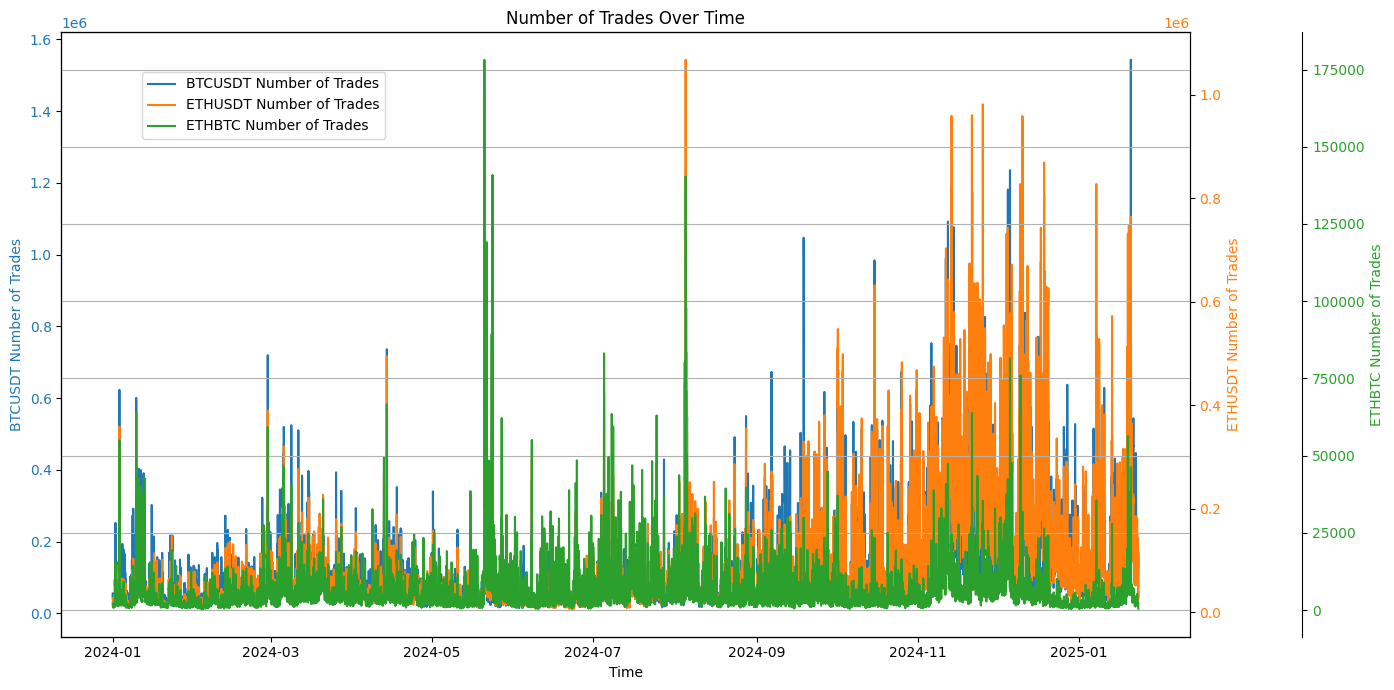

In [7]:
# Plot the data for Number of Trades
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the first symbol on the primary y-axis
symbol_data = all_data[all_data['Symbol'] == symbols[0]]
ax1.set_xlabel('Time')
ax1.set_ylabel(f'{symbols[0]} Number of Trades', color='tab:blue')
ax1.plot(symbol_data['Open time'], symbol_data['Number of trades'], color='tab:blue', label=f'{symbols[0]} Number of Trades')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for the second symbol
ax2 = ax1.twinx()
symbol_data = all_data[all_data['Symbol'] == symbols[1]]
ax2.set_ylabel(f'{symbols[1]} Number of Trades', color='tab:orange')
ax2.plot(symbol_data['Open time'], symbol_data['Number of trades'], color='tab:orange', label=f'{symbols[1]} Number of Trades')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Create a tertiary y-axis for the third symbol
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))  # Move the tertiary y-axis to the right
symbol_data = all_data[all_data['Symbol'] == symbols[2]]
ax3.set_ylabel(f'{symbols[2]} Number of Trades', color='tab:green')
ax3.plot(symbol_data['Open time'], symbol_data['Number of trades'], color='tab:green', label=f'{symbols[2]} Number of Trades')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Add a title and grid
plt.title('Number of Trades Over Time')
plt.grid(True)

# Add a legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


In [8]:
from binance.client import Client

api_key = "xxx"
api_secret = "xxx"

client = Client(api_key, api_secret)
exchange_info = client.get_exchange_info()

# Define the pairs you are interested in
pairs = [("BTC", "ETH"), ("ETH", "USDT"), ("USDT", "BTC")]

for s in exchange_info['symbols']:
    symbol = s['symbol']
    # Check if the symbol matches any of the pairs
    if any(pair[0] in symbol and pair[1] in symbol for pair in pairs):
        print(symbol)

ETHBTC
BTCUSDT
ETHUSDT
ETHBULLUSDT
ETHBEARUSDT
BTCUPUSDT
BTCDOWNUSDT
ETHUPUSDT
ETHDOWNUSDT
WBTCETH
RENBTCETH
BTCSTUSDT
BETHUSDT
WBTCUSDT
WBETHUSDT
ETHFIBTC
ETHFIUSDT


C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\711764522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data[col] = pd.to_numeric(symbol_data[col], errors='coerce')
c:\Users\Bamdantag\miniconda3\envs\binance\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


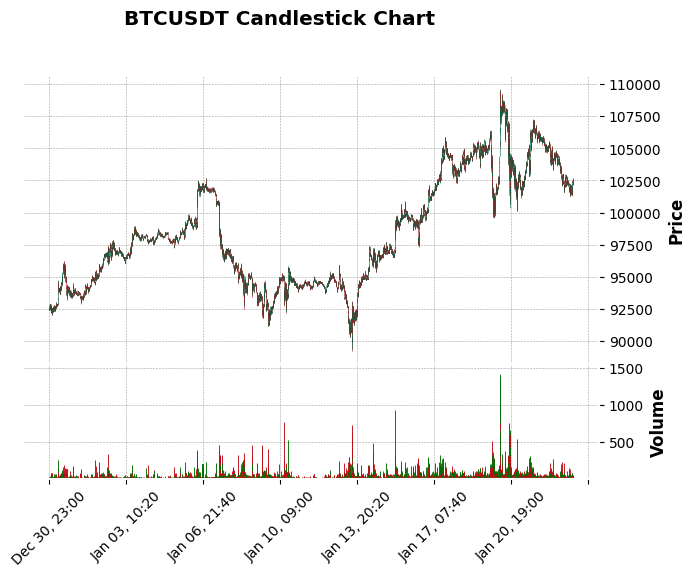

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf

# Filter data for BTCUSDT
symbol_data = all_data[all_data['Symbol'] == "BTCUSDT"]

# Convert relevant columns to numeric, coercing errors to NaN
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    symbol_data[col] = pd.to_numeric(symbol_data[col], errors='coerce')

# Drop rows with any NaN values
symbol_data = symbol_data.dropna(subset=numeric_columns)

# Convert 'Open time' to datetime
symbol_data['Open time'] = pd.to_datetime(symbol_data['Open time'], unit='ms')

# Set 'Open time' as the index
symbol_data.set_index('Open time', inplace=True)

# Create the candlestick chart
mpf.plot(symbol_data[numeric_columns], type='candle', volume=True, style='charles', title='BTCUSDT Candlestick Chart', ylabel='Price')


C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\1753015701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MA50'] = symbol_data['Close'].rolling(window=50).mean()
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\1753015701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MA200'] = symbol_data['Close'].rolling(window=200).mean()


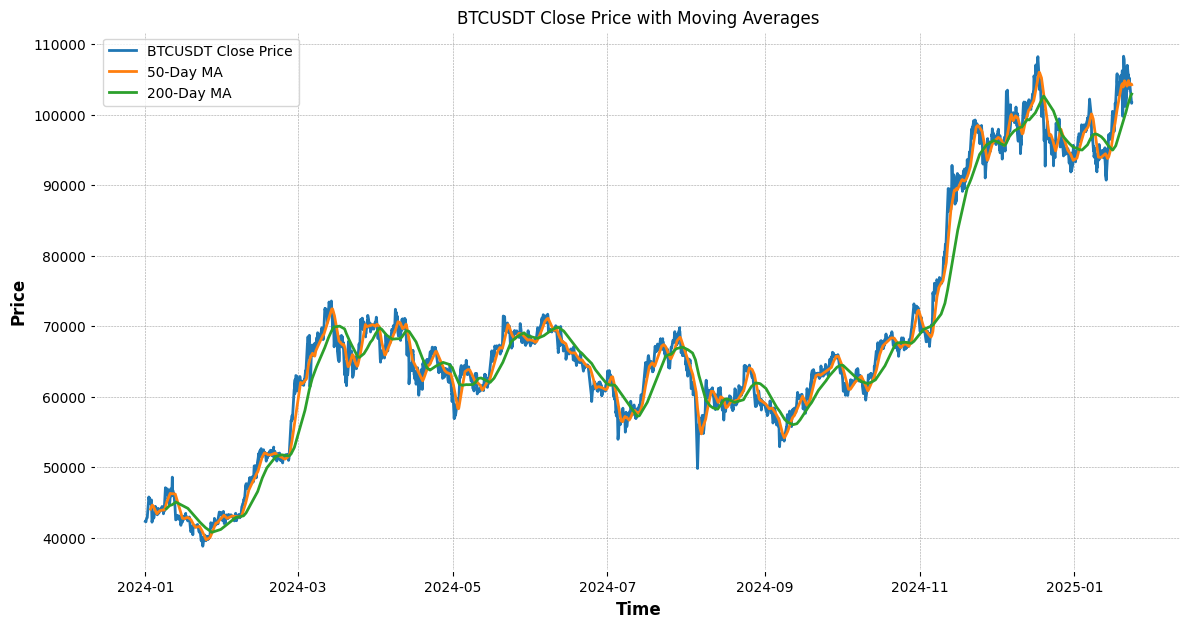

In [10]:
import matplotlib.pyplot as plt

# Filter data for BTCUSDT
symbol_data = all_data[all_data['Symbol'] == "BTCUSDT"]

# Calculate moving averages
symbol_data['MA50'] = symbol_data['Close'].rolling(window=50).mean()
symbol_data['MA200'] = symbol_data['Close'].rolling(window=200).mean()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(symbol_data['Open time'], symbol_data['Close'], label='BTCUSDT Close Price', color='tab:blue')
plt.plot(symbol_data['Open time'], symbol_data['MA50'], label='50-Day MA', color='tab:orange')
plt.plot(symbol_data['Open time'], symbol_data['MA200'], label='200-Day MA', color='tab:green')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('BTCUSDT Close Price with Moving Averages')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [11]:
import matplotlib.pyplot as plt

# Filter data for BTCUSDT
symbol_data = all_data[all_data['Symbol'] == "BTCUSDT"]

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot close prices
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(symbol_data['Open time'], symbol_data['Close'], color='tab:blue', label='BTCUSDT Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(symbol_data['Open time'], symbol_data['Volume'], color='tab:orange', alpha=0.3, label='BTCUSDT Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title and grid
plt.title('BTCUSDT Close Price and Volume')
plt.grid(True)

# Add a legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


KeyboardInterrupt: 

C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\3419311155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MA20'] = symbol_data['Close'].rolling(window=20).mean()
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\3419311155.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['20SD'] = symbol_data['Close'].rolling(window=20).std()
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\3419311155.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

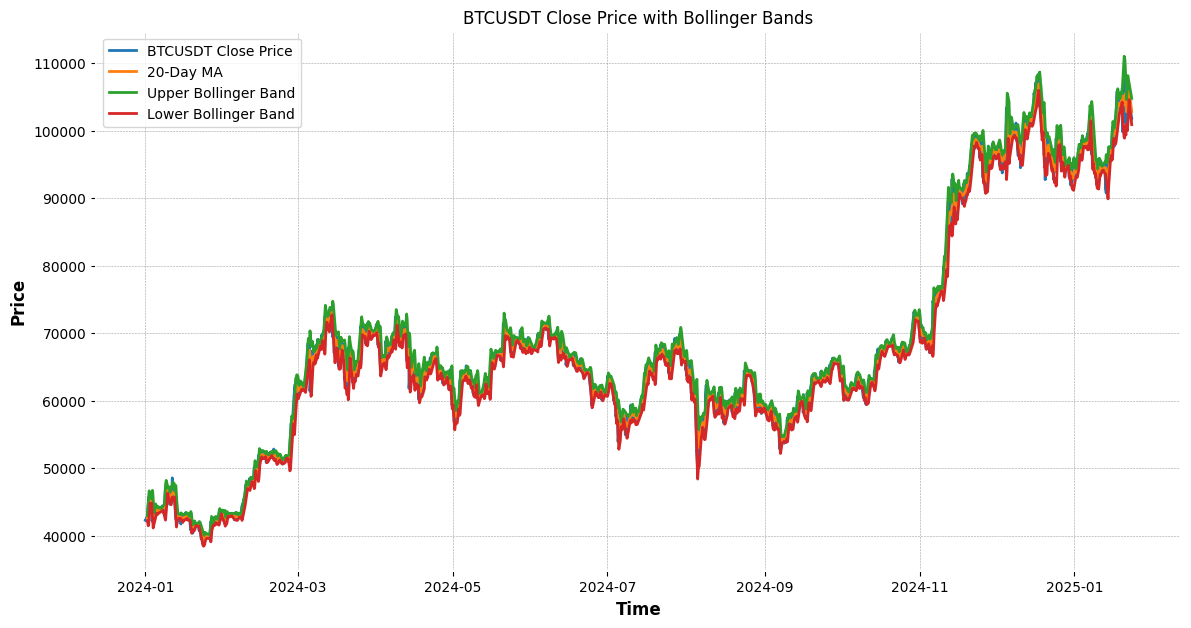

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for BTCUSDT
symbol_data = all_data[all_data['Symbol'] == "BTCUSDT"]

# Calculate Bollinger Bands
symbol_data['MA20'] = symbol_data['Close'].rolling(window=20).mean()
symbol_data['20SD'] = symbol_data['Close'].rolling(window=20).std()
symbol_data['UpperBand'] = symbol_data['MA20'] + (symbol_data['20SD'] * 2)
symbol_data['LowerBand'] = symbol_data['MA20'] - (symbol_data['20SD'] * 2)

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(symbol_data['Open time'], symbol_data['Close'], label='BTCUSDT Close Price', color='tab:blue')
plt.plot(symbol_data['Open time'], symbol_data['MA20'], label='20-Day MA', color='tab:orange')
plt.plot(symbol_data['Open time'], symbol_data['UpperBand'], label='Upper Bollinger Band', color='tab:green')
plt.plot(symbol_data['Open time'], symbol_data['LowerBand'], label='Lower Bollinger Band', color='tab:red')
plt.fill_between(symbol_data['Open time'], symbol_data['UpperBand'], symbol_data['LowerBand'], color='tab:green', alpha=0.1)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('BTCUSDT Close Price with Bollinger Bands')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


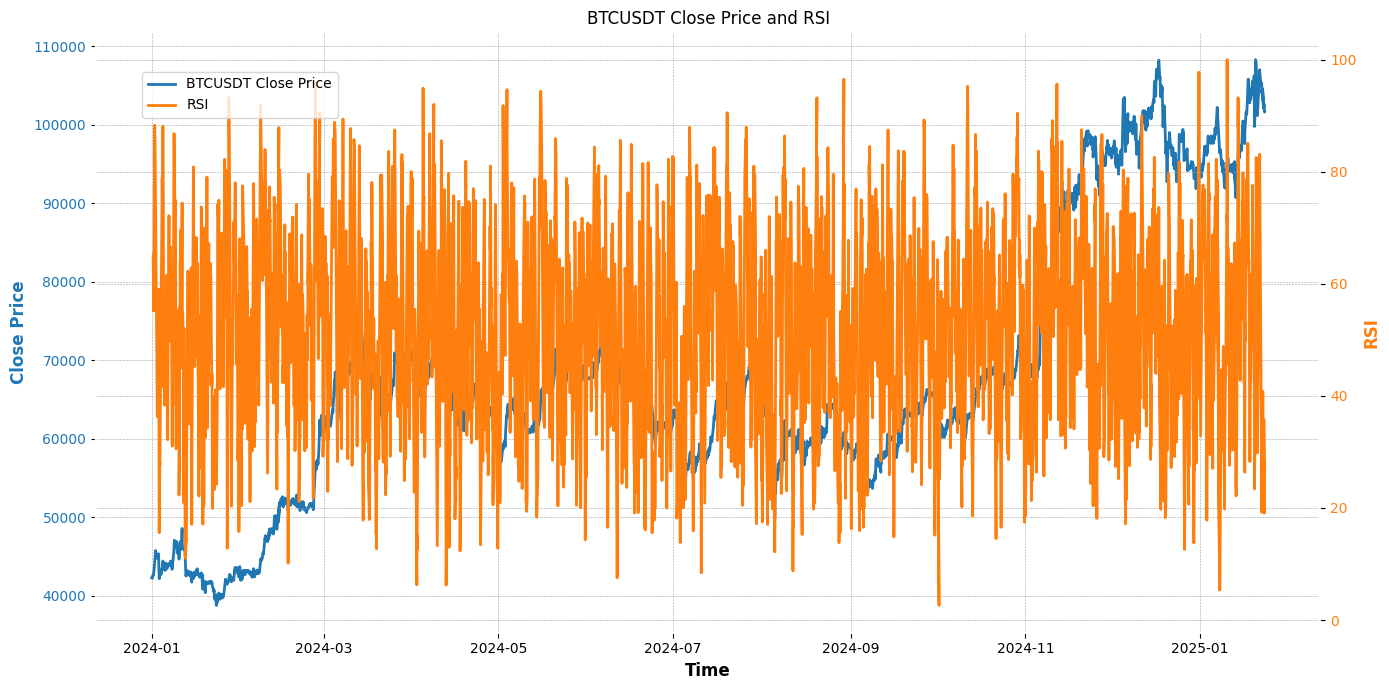

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for BTCUSDT
symbol_data = all_data[all_data['Symbol'] == "BTCUSDT"]

# Calculate RSI
delta = symbol_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
RSI = 100 - (100 / (1 + RS))

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot close prices
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(symbol_data['Open time'], symbol_data['Close'], color='tab:blue', label='BTCUSDT Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for RSI
ax2 = ax1.twinx()
ax2.set_ylabel('RSI', color='tab:orange')
ax2.plot(symbol_data['Open time'], RSI, color='tab:orange', label='RSI')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title and grid
plt.title('BTCUSDT Close Price and RSI')
plt.grid(True)

# Add a legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


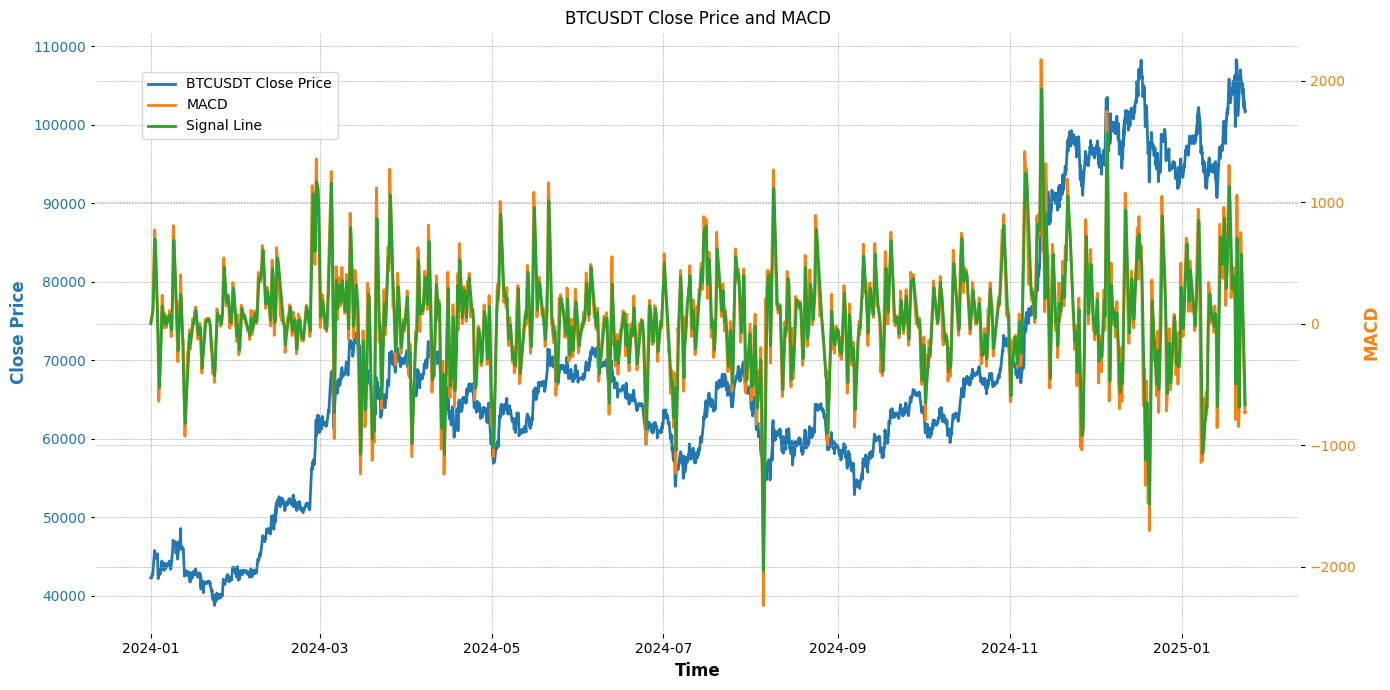

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for BTCUSDT
symbol_data = all_data[all_data['Symbol'] == "BTCUSDT"]

# Calculate MACD
short_ema = symbol_data['Close'].ewm(span=12, adjust=False).mean()
long_ema = symbol_data['Close'].ewm(span=26, adjust=False).mean()
MACD = short_ema - long_ema
signal = MACD.ewm(span=9, adjust=False).mean()

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot close prices
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(symbol_data['Open time'], symbol_data['Close'], color='tab:blue', label='BTCUSDT Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for MACD
ax2 = ax1.twinx()
ax2.set_ylabel('MACD', color='tab:orange')
ax2.plot(symbol_data['Open time'], MACD, color='tab:orange', label='MACD')
ax2.plot(symbol_data['Open time'], signal, color='tab:green', label='Signal Line')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title and grid
plt.title('BTCUSDT Close Price and MACD')
plt.grid(True)

# Add a legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


In [18]:
from backtesting.test import GOOG

In [19]:
GOOG

,Open,High,Low,Close,Volume
2004-08-19,100.00,104.06,95.96,100.34,22351900
2004-08-20,101.01,109.08,100.50,108.31,11428600
2004-08-23,110.75,113.48,109.05,109.40,9137200
2004-08-24,111.24,111.60,103.57,104.87,7631300
2004-08-25,104.96,108.00,103.88,106.00,4598900
...,...,...,...,...,...
2013-02-25,802.30,808.41,790.49,790.77,2303900
2013-02-26,795.00,795.95,784.40,790.13,2202500
2013-02-27,794.80,804.75,791.11,799.78,2026100
2013-02-28,801.10,806.99,801.03,801.20,2265800


In [11]:
def SMA(array, n):
    """Simple moving average"""
    return pd.Series(array).rolling(n).mean()


def RSI(array, n):
    """Relative strength index"""
    # Approximate; good enough
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

def EMA(array, n):
    return pd.Series(array).ewm(span=n, adjust=False).mean()

def MACD(array, fast=12, slow=26, signal=9):
    fast_ema = EMA(array, fast)
    slow_ema = EMA(array, slow)
    macd = fast_ema - slow_ema
    signal_line = EMA(macd, signal)
    return macd, signal_line

def BollingerBands(array, n=20, k=2):
    sma = SMA(array, n)
    std = pd.Series(array).rolling(n).std()
    upper_band = sma + k * std
    lower_band = sma - k * std
    return upper_band, sma, lower_band

def StochasticOscillator(high, low, close, n=14, k=3):
    lowest_low = pd.Series(low).rolling(n).min()
    highest_high = pd.Series(high).rolling(n).max()
    k_line = 100 * (close - lowest_low) / (highest_high - lowest_low)
    d_line = SMA(k_line, k)
    return k_line, d_line

def ATR(high, low, close, n=14):
    tr = pd.DataFrame(index=close.index)
    tr['h-l'] = high - low
    tr['h-pc'] = abs(high - close.shift(1))
    tr['l-pc'] = abs(low - close.shift(1))
    tr['tr'] = tr[['h-l', 'h-pc', 'l-pc']].max(axis=1)
    return tr['tr'].rolling(n).mean()

def OBV(close, volume):
    obv = pd.Series(index=close.index)
    obv.iloc[0] = volume.iloc[0]
    for i in range(1, len(close)):
        if close.iloc[i] > close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] + volume.iloc[i]
        elif close.iloc[i] < close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] - volume.iloc[i]
        else:
            obv.iloc[i] = obv.iloc[i-1]
    return obv



In [21]:
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply


class System(Strategy):
    d_rsi = 30  # Daily RSI lookback periods
    w_rsi = 30  # Weekly
    level = 70
    
    def init(self):
        # Compute moving averages the strategy demands
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        
        # Compute daily RSI(30)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)
        
        # To construct weekly RSI, we can use `resample_apply()`
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)
        
        
    def next(self):
        price = self.data.Close[-1]
        
        # If we don't already have a position, and
        # if all conditions are satisfied, enter long.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1]):
            
            # Buy at market price on next open, but do
            # set 8% fixed stop loss.
            self.buy(sl=.92 * price)
        
        # If the price closes 2% or more below 10-day MA
        # close the position, if any.
        elif price < .98 * self.ma10[-1]:
            self.position.close()

In [90]:
symbol_data.set_index('Open time', inplace=True)

KeyError: "None of ['Open time'] are in the columns"

In [91]:
symbol_data = symbol_data[['Open','High','Low','Close','Volume']]

In [92]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    symbol_data[col] = pd.to_numeric(symbol_data[col], errors='coerce')


C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2970887895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data[col] = pd.to_numeric(symbol_data[col], errors='coerce')


In [93]:
symbol_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34035 entries, 2024-12-30 23:00:00 to 2025-01-23 14:14:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    34035 non-null  float64
 1   High    34035 non-null  float64
 2   Low     34035 non-null  float64
 3   Close   34035 non-null  float64
 4   Volume  34035 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [94]:
symbol_data.sample(10)

,Open,High,Low,Close,Volume
Open time,,,,,
2025-01-03 13:45:00,96621.70,96638.96,96616.63,96638.96,6.06684
2025-01-04 19:44:00,98136.09,98140.98,98136.08,98140.97,1.42073
2025-01-13 10:45:00,91610.01,91616.16,91561.85,91582.55,38.67458
2025-01-02 23:16:00,96823.32,96842.04,96823.31,96834.03,2.52886
2025-01-20 12:36:00,106699.18,106912.00,106610.69,106903.22,48.42135
2025-01-10 16:35:00,93426.43,93519.99,93404.53,93519.99,22.81491
2025-01-10 06:44:00,94137.94,94137.94,94111.62,94111.63,5.58416
2025-01-15 20:10:00,100192.00,100192.00,100110.00,100120.00,45.43274
2025-01-09 08:54:00,93010.77,93058.97,93010.77,93044.92,7.56522


In [ ]:
symbol_data['Open'] = symbol_data['Open'] * 100000000  # Convert to satoshis
symbol_data['High'] = symbol_data['High'] * 100000000
symbol_data['Low'] = symbol_data['Low'] * 100000000
symbol_data['Close'] = symbol_data['Close'] * 100000000


In [45]:
backtest = Backtest(symbol_data, System, commission=0.001, cash=1000000)
backtest.run()

Start                     2019-12-31 23:00:00
End                       2025-01-23 13:00:00
Duration                   1849 days 14:00:00
Exposure Time [%]                      1.9252
Equity Final [$]                 852200.06395
Equity Peak [$]                 1142571.81602
Return [%]                          -14.77999
Buy & Hold Return [%]              1314.27043
Return (Ann.) [%]                    -3.10454
Volatility (Ann.) [%]                 8.19842
CAGR [%]                             -3.10688
Sharpe Ratio                         -0.37868
Sortino Ratio                        -0.48664
Calmar Ratio                         -0.12216
Max. Drawdown [%]                   -25.41387
Avg. Drawdown [%]                    -2.27473
Max. Drawdown Duration     1809 days 13:00:00
Avg. Drawdown Duration       79 days 20:00:00
# Trades                                   14
Win Rate [%]                         35.71429
Best Trade [%]                       10.60051
Worst Trade [%]                   

In [41]:
%%time

backtest.optimize(d_rsi=range(10, 35, 5),
                  w_rsi=range(10, 35, 5),
                  level=range(30, 80, 10))

CPU times: total: 11.2 s
Wall time: 11.3 s


Start                     2023-12-31 23:00:00
End                       2025-01-22 09:00:00
Duration                    387 days 10:00:00
Exposure Time [%]                     9.32358
Equity Final [$]                1337324.76843
Equity Peak [$]                 1409577.01843
Return [%]                           33.73248
Buy & Hold Return [%]               148.43819
Return (Ann.) [%]                    31.35557
Volatility (Ann.) [%]                 23.2937
CAGR [%]                             31.50207
Sharpe Ratio                           1.3461
Sortino Ratio                         4.07128
Calmar Ratio                          6.11718
Max. Drawdown [%]                    -5.12582
Avg. Drawdown [%]                    -1.46068
Max. Drawdown Duration      288 days 22:00:00
Avg. Drawdown Duration        9 days 10:00:00
# Trades                                    6
Win Rate [%]                         83.33333
Best Trade [%]                       18.08767
Worst Trade [%]                   

In [56]:
import sambo
backtest.optimize(
    d_rsi=range(5, 50, 2),
    w_rsi=range(5, 50, 2),
    level=range(20, 90, 2),
    method='sambo',
    max_tries=100,
    random_state=0
)



Start                     2023-12-31 23:00:00
End                       2025-01-22 09:00:00
Duration                    387 days 10:00:00
Exposure Time [%]                     2.14002
Equity Final [$]                1086855.66685
Equity Peak [$]                 1127855.91685
Return [%]                            8.68557
Buy & Hold Return [%]               148.43819
Return (Ann.) [%]                      8.1285
Volatility (Ann.) [%]                10.46444
CAGR [%]                              8.16304
Sharpe Ratio                          0.77677
Sortino Ratio                         1.88003
Calmar Ratio                          1.81224
Max. Drawdown [%]                    -4.48534
Avg. Drawdown [%]                    -1.13956
Max. Drawdown Duration      314 days 03:00:00
Avg. Drawdown Duration       23 days 04:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                        4.70509
Worst Trade [%]                   

In [28]:
import multiprocessing as mp
mp.set_start_method('spawn', force=True)

In [29]:
from multiprocessing import get_context
num_processes = 8
pool = get_context("spawn").Pool(num_processes)
pool.close()

In [46]:

backtest.optimize(
d_rsi=range(10, 35, 5),
w_rsi=range(10, 35, 5),
level=range(30, 80, 10),
    method='sambo',
    max_tries=100,
    random_state=0
)


Start                     2019-12-31 23:00:00
End                       2025-01-23 13:00:00
Duration                   1849 days 14:00:00
Exposure Time [%]                    28.40686
Equity Final [$]                5668107.10741
Equity Peak [$]                 6365274.97954
Return [%]                          466.81071
Buy & Hold Return [%]              1314.27043
Return (Ann.) [%]                    40.78973
Volatility (Ann.) [%]                43.61036
CAGR [%]                             40.82663
Sharpe Ratio                          0.93532
Sortino Ratio                         2.38297
Calmar Ratio                          1.41304
Max. Drawdown [%]                   -28.86666
Avg. Drawdown [%]                    -2.57648
Max. Drawdown Duration      776 days 02:00:00
Avg. Drawdown Duration       11 days 06:00:00
# Trades                                  109
Win Rate [%]                         49.54128
Best Trade [%]                       33.97247
Worst Trade [%]                   

In [ ]:
'''
    Stop Loss = Entry Price - (Entry Price * Risk Percentage)
    Take Profit = Entry Price + (Entry Price * Profit Percentage)


    Risk Percentage Calculation:
    Risk Percentage = (Stop Loss Amount / Account Balance) × 100


    Profit Percentage Calculation:
    Profit Percentage = (Profit Amount / Initial Investment) × 100

    Risk Percentage commonly used : 1 to 5 % of account balance, up to 15% for volatile asset like cryptocurrencies
    Reward-to-Risk ratio 2:1, 3:1 ideal
    Win rate > 75%
    
'''

In [32]:
def ATR(high, low, close, n=14):
    high = pd.Series(high)
    low = pd.Series(low)
    close = pd.Series(close)
    tr = pd.DataFrame()
    tr['h-l'] = high - low
    tr['h-pc'] = abs(high - close.shift(1))
    tr['l-pc'] = abs(low - close.shift(1))
    tr['tr'] = tr[['h-l', 'h-pc', 'l-pc']].max(axis=1)
    return tr['tr'].rolling(n).mean()

def StochasticOscillator(high, low, close, n=14, k=3):
    high = pd.Series(high)
    low = pd.Series(low)
    close = pd.Series(close)
    lowest_low = low.rolling(n).min()
    highest_high = high.rolling(n).max()
    k_line = 100 * (close - lowest_low) / (highest_high - lowest_low)
    d_line = SMA(k_line, k)
    return k_line, d_line

def OBV(close, volume):
    close = pd.Series(close)
    volume = pd.Series(volume)
    obv = pd.Series(index=close.index)
    obv.iloc[0] = volume.iloc[0]
    for i in range(1, len(close)):
        if close.iloc[i] > close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] + volume.iloc[i]
        elif close.iloc[i] < close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] - volume.iloc[i]
        else:
            obv.iloc[i] = obv.iloc[i-1]
    return obv


In [33]:
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply
class System2(Strategy):
    d_rsi = 30  # Daily RSI lookback periods
    w_rsi = 30  # Weekly
    level = 70
    
    def init(self):
        # Compute moving averages the strategy demands
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        
        # Compute daily RSI(30)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)
        
        # To construct weekly RSI, we can use `resample_apply()`
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)
        
        # Additional indicators
        self.macd, self.signal = self.I(MACD, self.data.Close)
        self.upper_bb, self.middle_bb, self.lower_bb = self.I(BollingerBands, self.data.Close)
        self.k_line, self.d_line = self.I(StochasticOscillator, self.data.High, self.data.Low, self.data.Close)
        self.atr = self.I(ATR, self.data.High, self.data.Low, self.data.Close)
        self.obv = self.I(OBV, self.data.Close, self.data.Volume)
        
    def next(self):
        price = self.data.Close[-1]
        
        # If we don't already have a position, and
        # if all conditions are satisfied, enter long.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1] and
            self.macd[-1] > self.signal[-1] and
            price > self.upper_bb[-1] and
            self.k_line[-1] > self.d_line[-1] and
            self.obv[-1] > self.obv[-2]):
            
            # Buy at market price on next open, but do
            # set 8% fixed stop loss.
            self.buy(sl=.92 * price)
        
        # If the price closes 2% or more below 10-day MA
        # or if the price crosses below the lower Bollinger Band
        # close the position, if any.
        elif price < .98 * self.ma10[-1] or price < self.lower_bb[-1]:
            self.position.close()

In [47]:
backtest = Backtest(symbol_data, System2, commission=0.001, cash=1000000)
backtest.run()

Start                     2019-12-31 23:00:00
End                       2025-01-23 13:00:00
Duration                   1849 days 14:00:00
Exposure Time [%]                     0.60191
Equity Final [$]                1062915.81135
Equity Peak [$]                 1109936.31641
Return [%]                            6.29158
Buy & Hold Return [%]              1314.27043
Return (Ann.) [%]                     1.21044
Volatility (Ann.) [%]                 4.74637
CAGR [%]                              1.21138
Sharpe Ratio                          0.25503
Sortino Ratio                         0.51298
Calmar Ratio                          0.13115
Max. Drawdown [%]                    -9.22923
Avg. Drawdown [%]                    -3.24132
Max. Drawdown Duration     1444 days 07:00:00
Avg. Drawdown Duration      202 days 12:00:00
# Trades                                    7
Win Rate [%]                         57.14286
Best Trade [%]                        4.33136
Worst Trade [%]                   

In [48]:

backtest.optimize(
d_rsi=range(10, 35, 5),
w_rsi=range(10, 35, 5),
level=range(30, 80, 10),
    method='sambo',
    max_tries=100,
    random_state=0,
)

Start                     2019-12-31 23:00:00
End                       2025-01-23 13:00:00
Duration                   1849 days 14:00:00
Exposure Time [%]                     8.35907
Equity Final [$]                2334869.14118
Equity Peak [$]                 2391872.46118
Return [%]                          133.48691
Buy & Hold Return [%]              1314.27043
Return (Ann.) [%]                    18.20013
Volatility (Ann.) [%]                20.31468
CAGR [%]                             18.21527
Sharpe Ratio                          0.89591
Sortino Ratio                         2.14008
Calmar Ratio                          1.31901
Max. Drawdown [%]                   -13.79833
Avg. Drawdown [%]                    -2.52133
Max. Drawdown Duration      998 days 12:00:00
Avg. Drawdown Duration       23 days 13:00:00
# Trades                                   83
Win Rate [%]                         51.80723
Best Trade [%]                       17.14372
Worst Trade [%]                   

In [63]:
from backtesting.lib import crossover

In [79]:
import tulipy as ti


In [82]:
class EMACrossover(Strategy):
    def init(self):
            # Define the periods for short and long EMAs
            self.short_period = 12
            self.long_period = 26
            
            # Calculate EMAs using Tulipy
            self.ema_short = self.I(self.ema, self.data.Close, self.short_period)
            self.ema_long = self.I(self.ema, self.data.Close, self.long_period)

    def next(self):
        if crossover(self.ema_short, self.ema_long):
            self.buy()
        elif crossover(self.ema_long, self.ema_short):
            self.sell()

    def ema(self, data, period):
        # Tulipy requires numpy arrays
        close_array = np.array(data)
        # Tulipy's EMA function returns an array, we need to return it as is
        return ti.ema(close_array, period)

In [101]:
class AggressiveScalpingStrategy(Strategy):
    short_ma = 5
    medium_ma = 10
    rsi_period = 14
    rsi_overbought = 70
    rsi_oversold = 30

    def init(self):
        self.short_sma = self.I(SMA, self.data.Close, self.short_ma)
        self.medium_sma = self.I(SMA, self.data.Close, self.medium_ma)
        self.rsi = self.I(RSI, self.data.Close, self.rsi_period)

    def next(self):
        if (crossover(self.short_sma, self.medium_sma) and
            self.rsi < self.rsi_oversold):
            self.buy()
        elif (crossover(self.medium_sma, self.short_sma) and
              self.rsi > self.rsi_overbought):
            self.sell()

In [102]:
backtest = Backtest(symbol_data, AggressiveScalpingStrategy, commission=0.001, cash=1000000, exclusive_orders=True)
backtest.run()

Start                     2024-12-30 23:00:00
End                       2025-01-23 14:14:00
Duration                     23 days 15:14:00
Exposure Time [%]                    99.19495
Equity Final [$]                1069940.82151
Equity Peak [$]                  1147066.4867
Return [%]                            6.99408
Buy & Hold Return [%]                10.34085
Return (Ann.) [%]                   168.31964
Volatility (Ann.) [%]               117.38426
CAGR [%]                            184.06249
Sharpe Ratio                          1.43392
Sortino Ratio                         7.32279
Calmar Ratio                         13.96454
Max. Drawdown [%]                   -12.05336
Avg. Drawdown [%]                    -0.57204
Max. Drawdown Duration        5 days 04:45:00
Avg. Drawdown Duration        0 days 05:06:00
# Trades                                  158
Win Rate [%]                         48.73418
Best Trade [%]                         5.8308
Worst Trade [%]                   

## Ici ca marche bien

In [106]:
params = {
    'short_ma': range(3, 8),  # Short-term moving average range
    'medium_ma': range(8, 15),  # Medium-term moving average range
    'rsi_period': range(10, 21),  # RSI period range
    'rsi_overbought': range(65, 81),  # RSI overbought threshold range
    'rsi_oversold': range(25, 41)  # RSI oversold threshold range
}

# Run the optimization
optimized = backtest.optimize(
    short_ma=params['short_ma'],
    medium_ma=params['medium_ma'],
    rsi_period=params['rsi_period'],
    rsi_overbought=params['rsi_overbought'],
    rsi_oversold=params['rsi_oversold'],
    maximize='Equity Final [$]',  # You can choose other metrics like 'Sharpe Ratio'
    return_heatmap=True,
    method="sambo"
)

C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2840004052.py:18: RuntimeWarning: divide by zero encountered in divide
  rs = avg_gain / avg_loss
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2840004052.py:18: RuntimeWarning: divide by zero encountered in divide
  rs = avg_gain / avg_loss
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2840004052.py:18: RuntimeWarning: divide by zero encountered in divide
  rs = avg_gain / avg_loss
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2840004052.py:18: RuntimeWarning: divide by zero encountered in divide
  rs = avg_gain / avg_loss
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2840004052.py:18: RuntimeWarning: divide by zero encountered in divide
  rs = avg_gain / avg_loss
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2840004052.py:18: RuntimeWarning: divide by zero encountered in divide
  rs = avg_gain / avg_loss
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2840004052.py:18: RuntimeWarning: 

In [109]:

# Print the optimized parameters
print(optimized)

(Start                     2024-12-30 23:00:00
End                       2025-01-23 14:14:00
Duration                     23 days 15:14:00
Exposure Time [%]                    98.29587
Equity Final [$]                1406367.25003
Equity Peak [$]                 1472911.57463
Return [%]                           40.63673
Buy & Hold Return [%]                10.34085
Return (Ann.) [%]                  14429.1989
Volatility (Ann.) [%]              9665.58125
CAGR [%]                          19270.69533
Sharpe Ratio                          1.49284
Sortino Ratio                       826.95671
Calmar Ratio                       2383.31566
Max. Drawdown [%]                    -6.05425
Avg. Drawdown [%]                    -0.42157
Max. Drawdown Duration        1 days 19:34:00
Avg. Drawdown Duration        0 days 01:46:00
# Trades                                   33
Win Rate [%]                         69.69697
Best Trade [%]                        7.20498
Worst Trade [%]                  

In [120]:
# Set parameters
symbols = ["BTCUSDT", "ETHUSDT", "ETHBTC"]
interval = "1m"
start_time = int(datetime(2024, 12, 1).timestamp() * 1000)
end_time = int(datetime(2024, 12, 31).timestamp() * 1000)

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

for symbol in symbols:
    # Fetch data
    data = get_binance_data(symbol, interval, start_time, end_time)

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df['Close'] = df['Close'].astype(float)
    df['Symbol'] = symbol  # Add a column to identify the symbol

    # Append to the all_data DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)


In [126]:
symbol_data = all_data[all_data['Symbol'] == "BTCUSDT"]
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    symbol_data[col] = pd.to_numeric(symbol_data[col], errors='coerce')

KeyError: 'Symbol'

## La aussi

In [124]:
# Define the optimized parameters from the previous backtest
optimized_params = {
    'short_ma': 9,
    'medium_ma': 15,
    'rsi_period': 65,
    'rsi_overbought': 70,
    'rsi_oversold': 30
}

class AggressiveScalpingStrategy(Strategy):
    short_ma = optimized_params['short_ma']
    medium_ma = optimized_params['medium_ma']
    rsi_period = optimized_params['rsi_period']
    rsi_overbought = optimized_params['rsi_overbought']
    rsi_oversold = optimized_params['rsi_oversold']

    def init(self):
        self.short_sma = self.I(SMA, self.data.Close, self.short_ma)
        self.medium_sma = self.I(SMA, self.data.Close, self.medium_ma)
        self.rsi = self.I(RSI, self.data.Close, self.rsi_period)

    def next(self):
        if (crossover(self.short_sma, self.medium_sma) and
            self.rsi < self.rsi_oversold):
            self.buy()
        elif (crossover(self.medium_sma, self.short_sma) and
              self.rsi > self.rsi_overbought):
            self.sell()

# Initialize the backtest with the new timeframe data
bt = Backtest(symbol_data, AggressiveScalpingStrategy, cash=1000000, commission=.001)

# Run the backtest
stats = bt.run()

# Print the results
print(stats)

c:\Users\Bamdantag\miniconda3\envs\binance\Lib\site-packages\backtesting\backtesting.py:1105: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  (data.index.is_numeric() and
C:\Users\Bamdantag\AppData\Local\Temp\ipykernel_18096\2026781437.py:31: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(symbol_data, AggressiveScalpingStrategy, cash=1000000, commission=.001)


Start                                     0.0
End                                   43200.0
Duration                              43200.0
Exposure Time [%]                    86.06745
Equity Final [$]                1095065.38577
Equity Peak [$]                 1106178.22577
Return [%]                            9.50654
Buy & Hold Return [%]                -3.86487
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                    -12.8509
Avg. Drawdown [%]                    -1.13833
Max. Drawdown Duration                20973.0
Avg. Drawdown Duration              977.39474
# Trades                                  3.0
Win Rate [%]                            100.0
Best Trade [%]                        9.87654
Worst Trade [%]                       5.94692
Avg. Trade [%]                    

In [15]:
import requests
from datetime import datetime, timedelta
import pandas as pd

def get_binance_data(symbol, interval, start_time, end_time, limit=500):
    url = "https://api.binance.com/api/v3/klines"
    params = {
        "symbol": symbol,
        "interval": interval,
        "startTime": start_time,
        "endTime": end_time,
        "limit": limit
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Set parameters
symbol = "BTCUSDT"
interval = "1m"
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 1, 24, 9, 0)  # Current date from the query
limit = 500

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Loop to fetch data in chunks
current_start = start_date
while current_start < end_date:
    current_end = min(current_start + timedelta(hours=limit), end_date)
    
    start_time = int(current_start.timestamp() * 1000)
    end_time = int(current_end.timestamp() * 1000)
    
    # Fetch data
    data = get_binance_data(symbol, interval, start_time, end_time, limit)
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df['Close'] = df['Close'].astype(float)
    df['Symbol'] = symbol
    
    # Append to the all_data DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)
    
    # Update the start time for the next iteration
    current_start = current_end

# Display results
print(all_data[['Open time', 'Symbol', 'Close']])



                Open time   Symbol      Close
0     2022-12-31 23:00:00  BTCUSDT   16520.61
1     2022-12-31 23:01:00  BTCUSDT   16503.24
2     2022-12-31 23:02:00  BTCUSDT   16511.60
3     2022-12-31 23:03:00  BTCUSDT   16507.49
4     2022-12-31 23:04:00  BTCUSDT   16506.14
...                   ...      ...        ...
18495 2025-01-20 07:15:00  BTCUSDT  108841.59
18496 2025-01-20 07:16:00  BTCUSDT  108476.80
18497 2025-01-20 07:17:00  BTCUSDT  108353.03
18498 2025-01-20 07:18:00  BTCUSDT  108119.90
18499 2025-01-20 07:19:00  BTCUSDT  108345.02

[18500 rows x 3 columns]


In [16]:
all_data

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Symbol
0,2022-12-31 23:00:00,16520.28000000,16524.91000000,16514.66000000,16520.61,135.29762000,1672527659999,2235025.57296010,3705,63.52082000,1049353.35510750,0,BTCUSDT
1,2022-12-31 23:01:00,16520.61000000,16520.64000000,16501.92000000,16503.24,103.02432000,1672527719999,1701165.24449830,2678,28.10022000,463990.19489760,0,BTCUSDT
2,2022-12-31 23:02:00,16503.30000000,16517.03000000,16500.24000000,16511.60,221.08856000,1672527779999,3650138.04835310,4784,117.26861000,1936051.82785230,0,BTCUSDT
3,2022-12-31 23:03:00,16510.97000000,16520.31000000,16505.36000000,16507.49,168.52200000,1672527839999,2782765.14310700,3464,80.20926000,1324541.30951640,0,BTCUSDT
4,2022-12-31 23:04:00,16506.93000000,16511.64000000,16501.78000000,16506.14,139.78862000,1672527899999,2307476.13534510,3677,76.11628000,1256482.77477660,0,BTCUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18495,2025-01-20 07:15:00,108975.43000000,109081.13000000,108697.81000000,108841.59,114.14746000,1737357359999,12431439.80801130,15400,53.26427000,5800537.96080920,0,BTCUSDT
18496,2025-01-20 07:16:00,108841.59000000,108882.62000000,108400.00000000,108476.80,145.69056000,1737357419999,15826979.85982130,16063,58.25106000,6329459.61843060,0,BTCUSDT
18497,2025-01-20 07:17:00,108476.79000000,108557.84000000,108134.34000000,108353.03,157.99333000,1737357479999,17122757.40159900,17683,69.12991000,7492860.53751720,0,BTCUSDT
18498,2025-01-20 07:18:00,108353.03000000,108416.24000000,108019.85000000,108119.90,174.23789000,1737357539999,18844261.12051460,14445,66.44217000,7185542.24995430,0,BTCUSDT


In [17]:
all_data.set_index('Open time', inplace=True)

In [18]:
symbol_data = all_data.copy()
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    symbol_data[col] = pd.to_numeric(symbol_data[col], errors='coerce')

In [33]:
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply, crossover

In [19]:
# Define the optimized parameters from the previous backtest
optimized_params = {
    'short_ma': 9,
    'medium_ma': 15,
    'rsi_period': 65,
    'rsi_overbought': 70,
    'rsi_oversold': 30
}

class AggressiveScalpingStrategy(Strategy):
    short_ma = optimized_params['short_ma']
    medium_ma = optimized_params['medium_ma']
    rsi_period = optimized_params['rsi_period']
    rsi_overbought = optimized_params['rsi_overbought']
    rsi_oversold = optimized_params['rsi_oversold']

    def init(self):
        self.short_sma = self.I(SMA, self.data.Close, self.short_ma)
        self.medium_sma = self.I(SMA, self.data.Close, self.medium_ma)
        self.rsi = self.I(RSI, self.data.Close, self.rsi_period)

    def next(self):
        if (crossover(self.short_sma, self.medium_sma) and
            self.rsi < self.rsi_oversold):
            self.buy()
        elif (crossover(self.medium_sma, self.short_sma) and
              self.rsi > self.rsi_overbought):
            self.sell()

# Initialize the backtest with the new timeframe data
bt = Backtest(symbol_data, AggressiveScalpingStrategy, cash=1000000, commission=.001)

# Run the backtest
stats = bt.run()

# Print the results
print(stats)

Start                     2022-12-31 23:00:00
End                       2025-01-20 07:19:00
Duration                    750 days 08:19:00
Exposure Time [%]                    45.87027
Equity Final [$]                          0.0
Equity Peak [$]                 1085159.86158
Return [%]                             -100.0
Buy & Hold Return [%]               555.81731
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]          250935871.8713
CAGR [%]                               -100.0
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                      -100.0
Avg. Drawdown [%]                    -2.33683
Max. Drawdown Duration      687 days 13:12:00
Avg. Drawdown Duration       15 days 20:37:00
# Trades                                    7
Win Rate [%]                         85.71429
Best Trade [%]                        6.42023
Worst Trade [%]                   

In [24]:
# Define the optimized parameters from the previous backtest
optimized_params = {
    'short_ma': 9,
    'medium_ma': 15,
    'rsi_period': 65,
    'rsi_overbought': 70,
    'rsi_oversold': 30,
    'stop_loss_pct': 0.02,  # 2% stop-loss
    'take_profit_pct': 0.03  # 3% take-profit
}

class EnhancedAggressiveScalpingStrategy(Strategy):
    short_ma = optimized_params['short_ma']
    medium_ma = optimized_params['medium_ma']
    rsi_period = optimized_params['rsi_period']
    rsi_overbought = optimized_params['rsi_overbought']
    rsi_oversold = optimized_params['rsi_oversold']
    stop_loss_pct = optimized_params['stop_loss_pct']
    take_profit_pct = optimized_params['take_profit_pct']

    def init(self):
        self.short_sma = self.I(SMA, self.data.Close, self.short_ma)
        self.medium_sma = self.I(SMA, self.data.Close, self.medium_ma)
        self.rsi = self.I(RSI, self.data.Close, self.rsi_period)

    def next(self):
        current_price = self.data.Close[-1]
        stop_loss = current_price * (1 - self.stop_loss_pct)
        take_profit = current_price * (1 + self.take_profit_pct)
        if (crossover(self.short_sma, self.medium_sma) and
            self.rsi < self.rsi_oversold):
            self.buy(sl=stop_loss, tp=take_profit)
        elif (crossover(self.medium_sma, self.short_sma) and
              self.rsi > self.rsi_overbought):
            self.sell(sl=take_profit, tp=stop_loss)
# Initialize the backtest with the longer-term data
bt = Backtest(symbol_data, EnhancedAggressiveScalpingStrategy, cash=1000000, commission=.001)

# Run the backtest
stats = bt.run()

# Print the results
print(stats)


Start                     2022-12-31 23:00:00
End                       2025-01-20 07:19:00
Duration                    750 days 08:19:00
Exposure Time [%]                    73.81622
Equity Final [$]                 286962.01234
Equity Peak [$]                 1054128.22596
Return [%]                           -71.3038
Buy & Hold Return [%]               555.81731
Return (Ann.) [%]                   -99.98898
Volatility (Ann.) [%]                 0.05597
CAGR [%]                            -45.51674
Sharpe Ratio                      -1786.32859
Sortino Ratio                         -0.6022
Calmar Ratio                         -1.32998
Max. Drawdown [%]                   -75.18073
Avg. Drawdown [%]                     -2.2314
Max. Drawdown Duration      666 days 22:03:00
Avg. Drawdown Duration       19 days 02:42:00
# Trades                                   32
Win Rate [%]                           46.875
Best Trade [%]                       14.33756
Worst Trade [%]                   

c:\Users\Bamdantag\miniconda3\envs\binance\Lib\site-packages\backtesting\_plotting.py:122: UserWarning: Data contains too many candlesticks to plot; downsampling to '2H'. See `Backtest.plot(resample=...)`
  warnings.warn(f"Data contains too many candlesticks to plot; downsampling to {freq!r}. "
c:\Users\Bamdantag\miniconda3\envs\binance\Lib\site-packages\backtesting\_plotting.py:126: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample(freq, label='right').agg(OHLCV_AGG).dropna()
c:\Users\Bamdantag\miniconda3\envs\binance\Lib\site-packages\backtesting\_plotting.py:128: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  indicators = [_Indicator(i.df.resample(freq, label='right').mean()
c:\Users\Bamdantag\miniconda3\envs\binance\Lib\site-packages\backtesting\_plotting.py:128: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  in

GridPlot(id='p1387', ...)

In [25]:
params = {
    'short_ma': range(3, 8),  # Short-term moving average range
    'medium_ma': range(8, 15),  # Medium-term moving average range
    'rsi_period': range(10, 21),  # RSI period range
    'rsi_overbought': range(65, 81),  # RSI overbought threshold range
    'rsi_oversold': range(25, 41)  # RSI oversold threshold range
}

# Run the optimization
optimized = bt.optimize(
    short_ma=params['short_ma'],
    medium_ma=params['medium_ma'],
    rsi_period=params['rsi_period'],
    rsi_overbought=params['rsi_overbought'],
    rsi_oversold=params['rsi_oversold'],
    maximize='Equity Final [$]',  # You can choose other metrics like 'Sharpe Ratio'
    method="sambo"
)

In [26]:
print(optimized)

Start                     2022-12-31 23:00:00
End                       2025-01-20 07:19:00
Duration                    750 days 08:19:00
Exposure Time [%]                    84.55676
Equity Final [$]                1007307.82971
Equity Peak [$]                  1722872.0799
Return [%]                            0.73078
Buy & Hold Return [%]               555.81731
Return (Ann.) [%]                     5.45912
Volatility (Ann.) [%]              2568.45624
CAGR [%]                              0.35482
Sharpe Ratio                          0.00213
Sortino Ratio                         0.03025
Calmar Ratio                          0.09017
Max. Drawdown [%]                   -60.54171
Avg. Drawdown [%]                    -1.89213
Max. Drawdown Duration      666 days 22:03:00
Avg. Drawdown Duration       19 days 17:51:00
# Trades                                   50
Win Rate [%]                             68.0
Best Trade [%]                       40.60635
Worst Trade [%]                   

In [27]:
symbol_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18500 entries, 2022-12-31 23:00:00 to 2025-01-20 07:19:00
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open                          18500 non-null  float64
 1   High                          18500 non-null  float64
 2   Low                           18500 non-null  float64
 3   Close                         18500 non-null  float64
 4   Volume                        18500 non-null  float64
 5   Close time                    18500 non-null  int64  
 6   Quote asset volume            18500 non-null  object 
 7   Number of trades              18500 non-null  int64  
 8   Taker buy base asset volume   18500 non-null  object 
 9   Taker buy quote asset volume  18500 non-null  object 
 10  Ignore                        18500 non-null  object 
 11  Symbol                        18500 non-null  object 
dtypes: float64(5), int64(2), 

In [38]:
import numpy as np

In [39]:
# Define the optimized parameters from the previous backtest
optimized_params = {
    'short_ma': 9,
    'medium_ma': 15,
    'rsi_period': 65,
    'rsi_overbought': 70,
    'rsi_oversold': 30,
    'stop_loss_pct': 0.02,  # 2% stop-loss
    'take_profit_pct': 0.03  # 3% take-profit
}
# Define the ATR indicator
def calculate_atr(high, low, close, period=14):
    # Convert to numpy arrays for consistent slicing and calculations
    high, low, close = np.array(high), np.array(low), np.array(close)
    
    # Shift close by 1 for previous values (prepend NaN to align shapes)
    prev_close = np.roll(close, 1)
    prev_close[0] = np.nan  # First value should not have a previous value
    
    # Calculate True Range (TR)
    tr1 = high - low
    tr2 = abs(high - prev_close)
    tr3 = abs(low - prev_close)
    tr = np.maximum.reduce([tr1, tr2, tr3])
    
    # Compute ATR using a rolling mean
    atr = pd.Series(tr).rolling(window=period, min_periods=1).mean().to_numpy()
    return atr

class RegimeBasedStrategy(Strategy):
    short_ma = optimized_params['short_ma']
    medium_ma = optimized_params['medium_ma']
    rsi_period = optimized_params['rsi_period']
    rsi_overbought = optimized_params['rsi_overbought']
    rsi_oversold = optimized_params['rsi_oversold']
    stop_loss_pct = optimized_params['stop_loss_pct']
    take_profit_pct = optimized_params['take_profit_pct']
    long_ma_period = 200  # Long-term moving average period for regime identification
    atr_period = 14  # ATR period for volatility identification

    def init(self):
        self.short_sma = self.I(SMA, self.data.Close, self.short_ma)
        self.medium_sma = self.I(SMA, self.data.Close, self.medium_ma)
        self.rsi = self.I(RSI, self.data.Close, self.rsi_period)
        self.long_sma = self.I(SMA, self.data.Close, self.long_ma_period)
        self.atr = calculate_atr(self.data.High, self.data.Low, self.data.Close, self.atr_period)

    def next(self):
        current_price = self.data.Close[-1]
        stop_loss = current_price * (1 - self.stop_loss_pct)
        take_profit = current_price * (1 + self.take_profit_pct)

        # Identify market regime
        if self.data.Close[-1] > self.long_sma[-1]:
            regime = 'bullish'
        elif self.data.Close[-1] < self.long_sma[-1]:
            regime = 'bearish'
        else:
            regime = 'sideways'

        # Apply different strategies based on regime
        if regime == 'bullish':
            if (crossover(self.short_sma, self.medium_sma) and
                self.rsi < self.rsi_oversold):
                self.buy(sl=stop_loss, tp=take_profit)
            elif (crossover(self.medium_sma, self.short_sma) and
                  self.rsi > self.rsi_overbought):
                self.sell(sl=take_profit, tp=stop_loss)
        elif regime == 'bearish':
            if (crossover(self.short_sma, self.medium_sma) and
                self.rsi < self.rsi_oversold):
                self.buy(sl=stop_loss * 0.95, tp=take_profit * 1.05)  # Wider stop-loss and take-profit
            elif (crossover(self.medium_sma, self.short_sma) and
                  self.rsi > self.rsi_overbought):
                self.sell(sl=take_profit * 0.95, tp=stop_loss * 1.05)  # Wider stop-loss and take-profit
        elif regime == 'sideways':
            if (crossover(self.short_sma, self.medium_sma) and
                self.rsi < self.rsi_oversold):
                self.buy(sl=stop_loss * 1.05, tp=take_profit * 0.95)  # Tighter stop-loss and take-profit
            elif (crossover(self.medium_sma, self.short_sma) and
                  self.rsi > self.rsi_overbought):
                self.sell(sl=take_profit * 1.05, tp=stop_loss * 0.95)  # Tighter stop-loss and take-profit

# Initialize the backtest with the longer-term data
bt = Backtest(symbol_data, RegimeBasedStrategy, cash=1000000, commission=.001)

# Run the backtest
stats = bt.run()

# Print the results
print(stats)

Start                     2022-12-31 23:00:00
End                       2025-01-20 07:19:00
Duration                    750 days 08:19:00
Exposure Time [%]                    82.46486
Equity Final [$]                 780696.56647
Equity Peak [$]                 1318545.63269
Return [%]                          -21.93034
Buy & Hold Return [%]               555.81731
Return (Ann.) [%]                   -83.58955
Volatility (Ann.) [%]               120.24159
CAGR [%]                            -11.34589
Sharpe Ratio                         -0.69518
Sortino Ratio                          -0.539
Calmar Ratio                         -1.75918
Max. Drawdown [%]                   -47.51612
Avg. Drawdown [%]                    -1.60037
Max. Drawdown Duration      333 days 12:17:00
Avg. Drawdown Duration       14 days 18:23:00
# Trades                                   29
Win Rate [%]                         62.06897
Best Trade [%]                       26.31836
Worst Trade [%]                   